In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
precipitacao_df = pd.read_csv('precipitacao.csv')
fa_casos_df = pd.read_excel('fa_casoshumanos_1994-2023(1).xlsx')

In [10]:
# Substituir vírgulas por pontos e converter os valores de precipitação para float
colunas_para_converter = precipitacao_df.columns[3:-1]
precipitacao_df[colunas_para_converter] = precipitacao_df[colunas_para_converter].replace(',', '.', regex=True).astype(float)

In [11]:
# Calcular a média de precipitação por mês (somando as precipitações de todas as estações)
media_precipitacao_mensal = precipitacao_df[colunas_para_converter].mean()

In [12]:
fa_casos_df_filtrado = fa_casos_df[(fa_casos_df['ANO_IS'] >= 1994) & (fa_casos_df['ANO_IS'] <= 2023)]

In [13]:
casos_por_mes = fa_casos_df_filtrado.groupby('MES_IS').size().reindex(range(1, 13), fill_value=0)

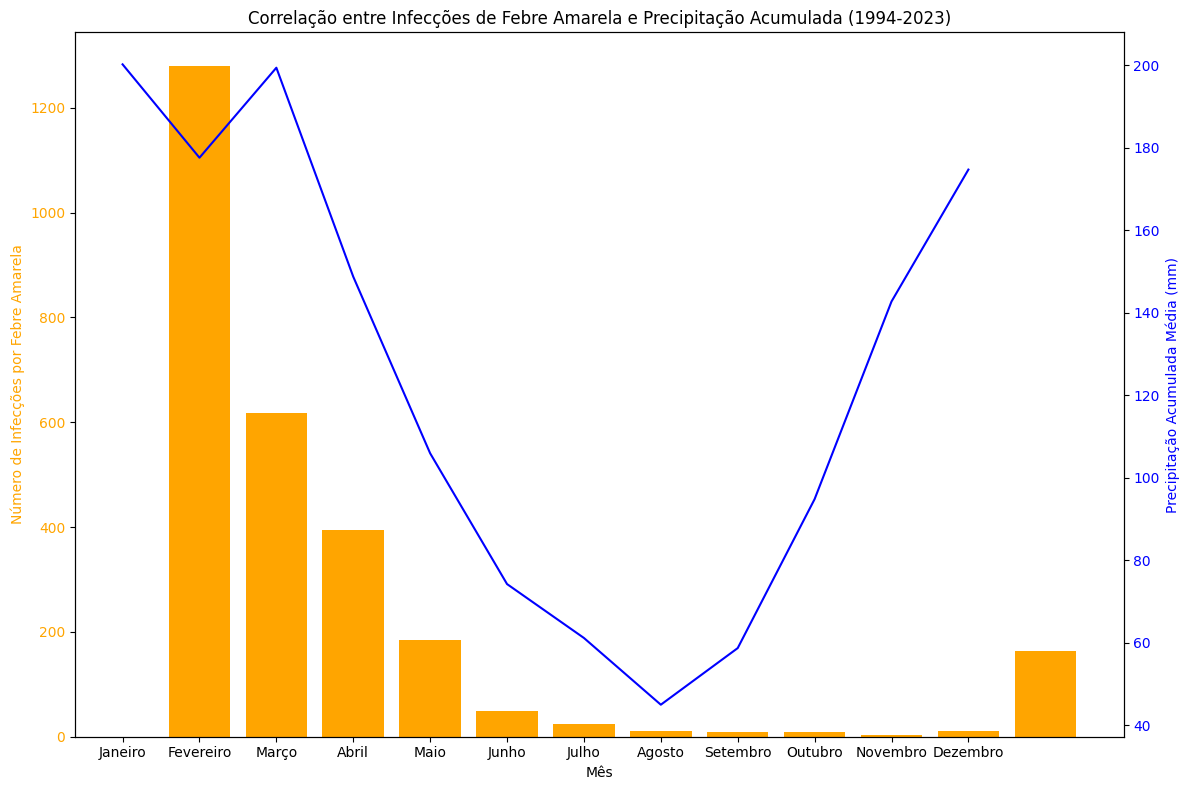

In [15]:
figura, eixo1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para infecções de febre amarela
eixo1.bar(casos_por_mes.index, casos_por_mes.values, color='orange', label='Infecções')
eixo1.set_xlabel('Mês')
eixo1.set_ylabel('Número de Infecções por Febre Amarela', color='orange')
eixo1.tick_params(axis='y', labelcolor='orange')

# Segundo eixo y para a precipitação
eixo2 = eixo1.twinx()
eixo2.plot(media_precipitacao_mensal.index, media_precipitacao_mensal.values, color='blue', label='Precipitação')
eixo2.set_ylabel('Precipitação Acumulada Média (mm)', color='blue')
eixo2.tick_params(axis='y', labelcolor='blue')

# Adicionar título e legendas
plt.title('Correlação entre Infecções de Febre Amarela e Precipitação Acumulada (1994-2023)')
figura.tight_layout()
plt.show()